# DATA UNDERSTANDING, CLEANING, AND PROCESSING

In [2]:
# Library Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("sickness_table.csv")

In [4]:
df.head()

,Unnamed: 0,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
0,0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,4,2016-04-05,63,7236.0,1700,90,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1152 non-null   int64  
 1   date        1152 non-null   object 
 2   n_sick      1152 non-null   int64  
 3   calls       1152 non-null   float64
 4   n_duty      1152 non-null   int64  
 5   n_sby       1152 non-null   int64  
 6   sby_need    1152 non-null   float64
 7   dafted      1152 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 72.1+ KB


Column Description:
• date: entry date
• n_sick: number of drivers called sick on duty
• calls: number of emergency calls
• n_duty: number of drivers on duty available
• n_sby: number of standby resources available
• sby_need: number of standbys, which are activated on a given day
• dafted: number of additional drivers needed due to not enough standbys

In [6]:
# change column names
df.rename(
    columns={"date": "entry_date", 
             "n_sick": "number_of_drivers_on_duty_that_called_in_sick", 
             "calls": "number_of_emergency_calls", 
             "n_duty": "number_of_drivers_on_duty_available", 
             "n_sby": "number_of_standby_resources_available",
             "sby_need": "number_of_standbys_activated",
             "dafted": "number_of_additional_drivers_needed_due_to_not_enough_standbys"},
    inplace=True,
)

The project aims at minimizing dates with not enough standbys while having only standbys that will be used. Thus, the target variable for our model shall be number_of_standbys_activated

In [7]:
df.head()

,Unnamed: 0,entry_date,number_of_drivers_on_duty_that_called_in_sick,number_of_emergency_calls,number_of_drivers_on_duty_available,number_of_standby_resources_available,number_of_standbys_activated,number_of_additional_drivers_needed_due_to_not_enough_standbys
0,0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,4,2016-04-05,63,7236.0,1700,90,0.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 8 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Unnamed: 0                                                      1152 non-null   int64  
 1   entry_date                                                      1152 non-null   object 
 2   number_of_drivers_on_duty_that_called_in_sick                   1152 non-null   int64  
 3   number_of_emergency_calls                                       1152 non-null   float64
 4   number_of_drivers_on_duty_available                             1152 non-null   int64  
 5   number_of_standby_resources_available                           1152 non-null   int64  
 6   number_of_standbys_activated                                    1152 non-null   float64
 7   number_of_additional_drivers_needed_due_to_not_enoug

In [9]:
# drop Unnamed column
df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 7 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   entry_date                                                      1152 non-null   object 
 1   number_of_drivers_on_duty_that_called_in_sick                   1152 non-null   int64  
 2   number_of_emergency_calls                                       1152 non-null   float64
 3   number_of_drivers_on_duty_available                             1152 non-null   int64  
 4   number_of_standby_resources_available                           1152 non-null   int64  
 5   number_of_standbys_activated                                    1152 non-null   float64
 6   number_of_additional_drivers_needed_due_to_not_enough_standbys  1152 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 63.

There are no null values in the data.

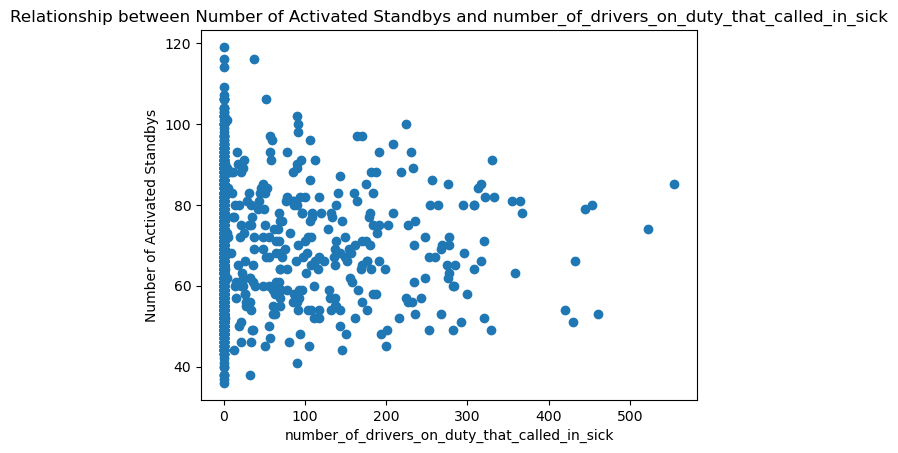

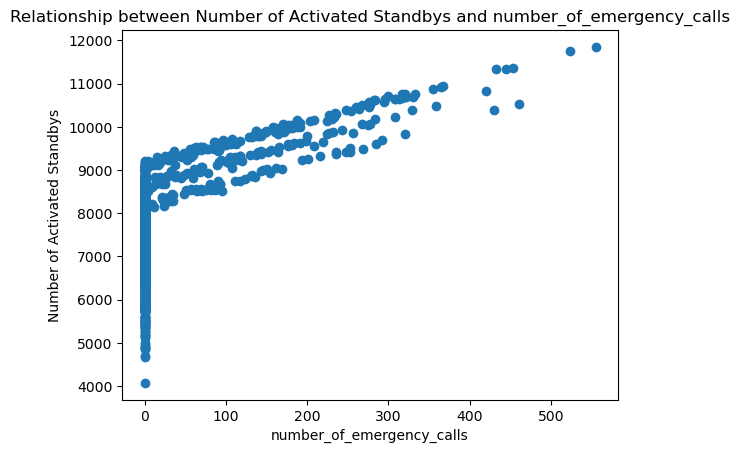

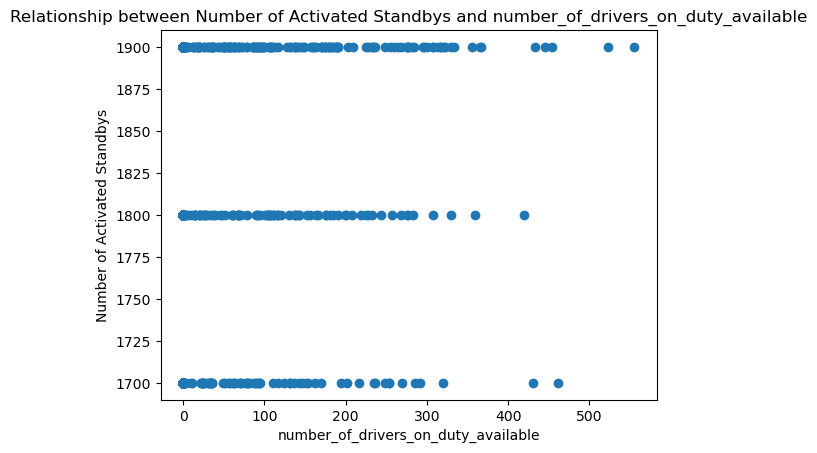

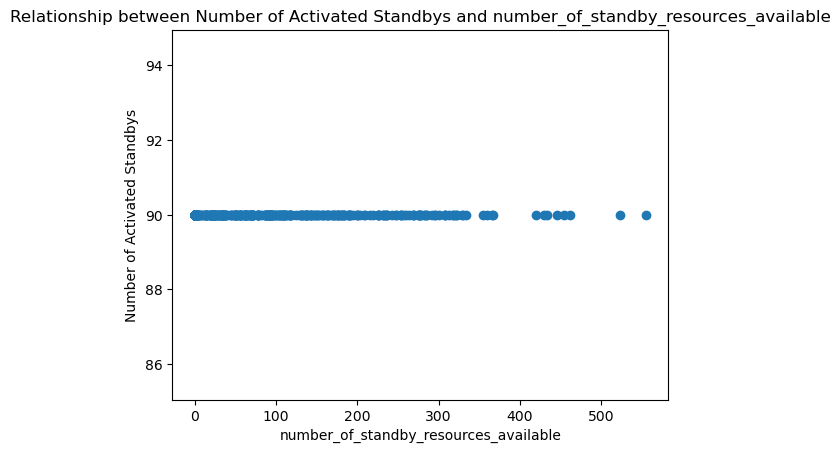

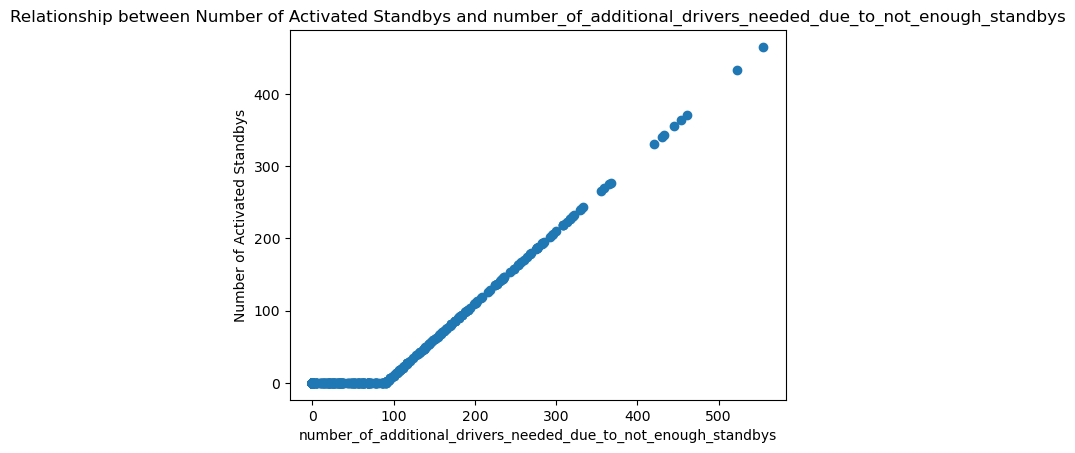

In [11]:
# Numerical columns
df_numerical_columns = df.drop(columns=['entry_date','number_of_standbys_activated'])

# Relationship between the target variables and the numerical variables

for label in df_numerical_columns.columns:
  plt.scatter(df["number_of_standbys_activated"], df_numerical_columns[label])
  plt.title(f'Relationship between Number of Activated Standbys and {label}')
  plt.ylabel("Number of Activated Standbys")
  plt.xlabel(label)
  plt.show()

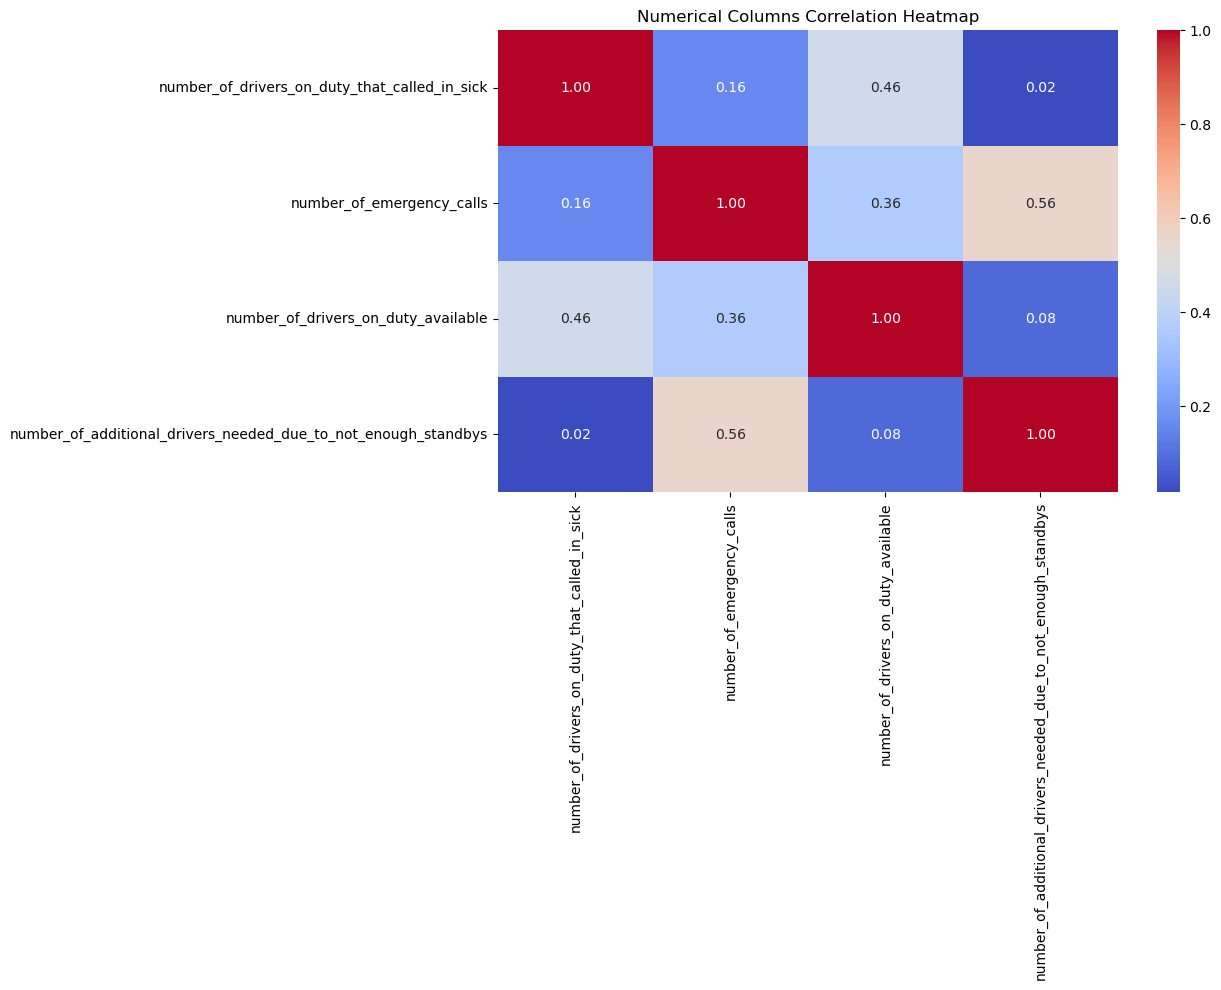

In [12]:
# Calculate correlation matrix
correlation_matrix = df_numerical_columns.drop(columns=['number_of_standby_resources_available']).corr()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Numerical Columns Correlation Heatmap')
plt.show()

In [13]:
# Convert 'entry_date' from string to date
df['entry_date'] = pd.to_datetime(df['entry_date'])

In [14]:
df.head()

,entry_date,number_of_drivers_on_duty_that_called_in_sick,number_of_emergency_calls,number_of_drivers_on_duty_available,number_of_standby_resources_available,number_of_standbys_activated,number_of_additional_drivers_needed_due_to_not_enough_standbys
0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,2016-04-05,63,7236.0,1700,90,0.0,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 7 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   entry_date                                                      1152 non-null   datetime64[ns]
 1   number_of_drivers_on_duty_that_called_in_sick                   1152 non-null   int64         
 2   number_of_emergency_calls                                       1152 non-null   float64       
 3   number_of_drivers_on_duty_available                             1152 non-null   int64         
 4   number_of_standby_resources_available                           1152 non-null   int64         
 5   number_of_standbys_activated                                    1152 non-null   float64       
 6   number_of_additional_drivers_needed_due_to_not_enough_standbys  1152 non-null   float64  

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

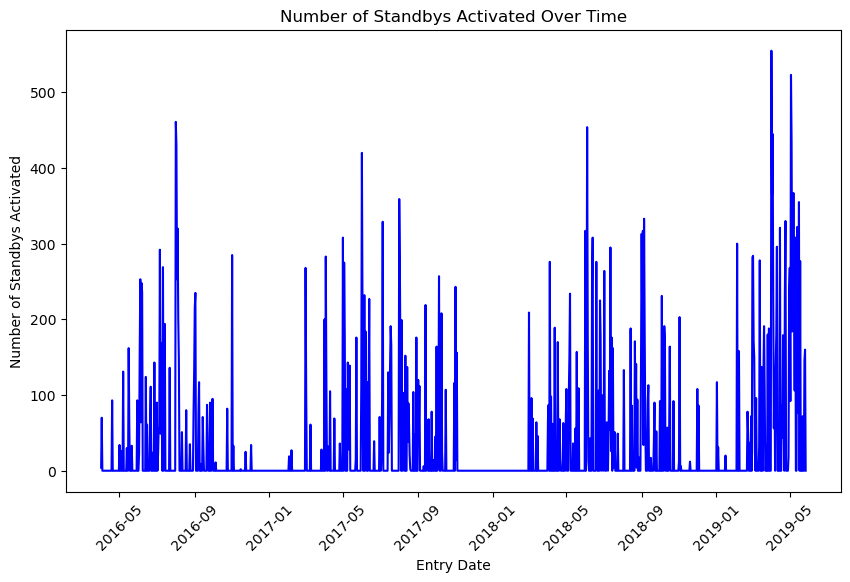

In [17]:
# Plotting number_of_standbys_activated against entry_date
plt.figure(figsize=(10, 6))
plt.plot(df['entry_date'], df['number_of_standbys_activated'], color='blue')

# Adding labels and title
plt.xlabel('Entry Date')
plt.ylabel('Number of Standbys Activated')
plt.title('Number of Standbys Activated Over Time')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

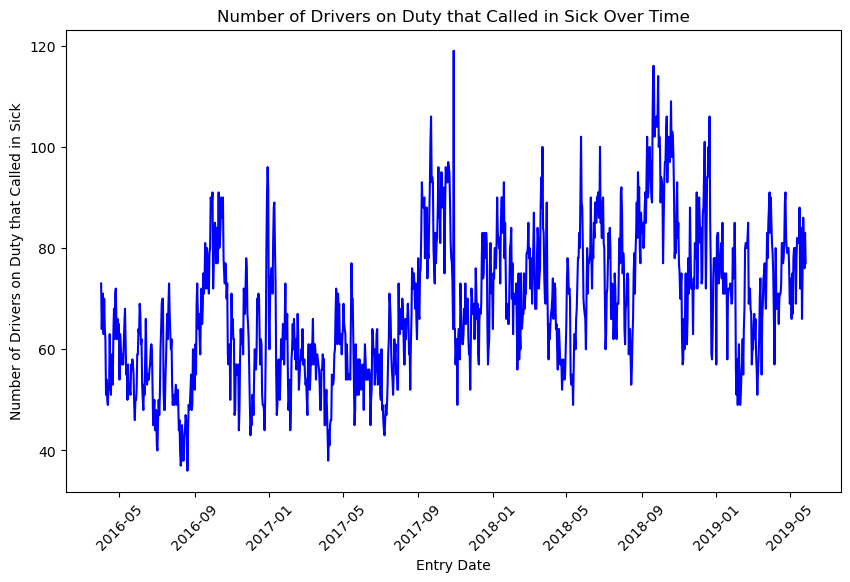

In [23]:
# Plotting number_of_standbys_activated against entry_date
plt.figure(figsize=(10, 6))
plt.plot(df['entry_date'], df['number_of_drivers_on_duty_that_called_in_sick'], color='blue')

# Adding labels and title
plt.xlabel('Entry Date')
plt.ylabel('Number of Drivers on Duty that Called in Sick')
plt.title('Number of Drivers on Duty that Called in Sick Over Time')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

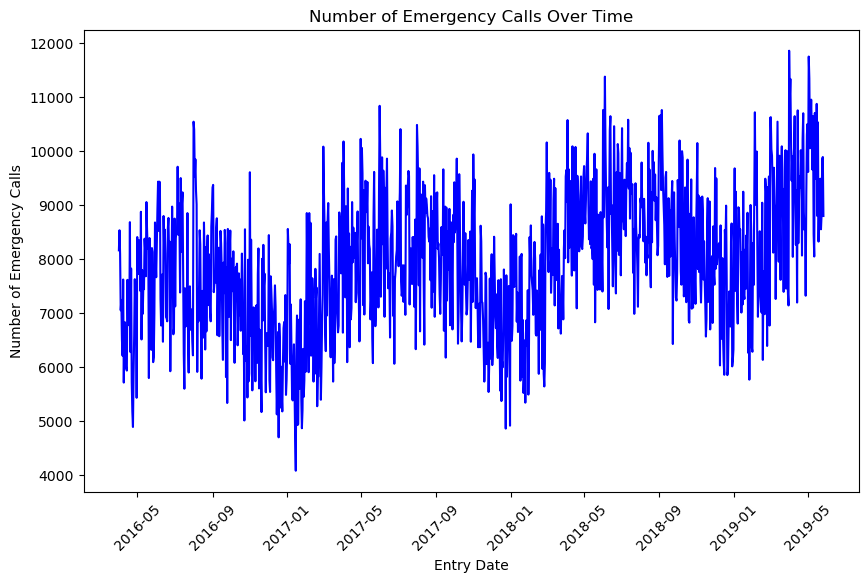

In [24]:
# Plotting number_of_standbys_activated against entry_date
plt.figure(figsize=(10, 6))
plt.plot(df['entry_date'], df['number_of_emergency_calls'], color='blue')

# Adding labels and title
plt.xlabel('Entry Date')
plt.ylabel('Number of Emergency Calls')
plt.title('Number of Emergency Calls Over Time')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [18]:
# Create a new column called "month"
df['month'] = df['entry_date'].dt.month

In [19]:
df.head()

,entry_date,number_of_drivers_on_duty_that_called_in_sick,number_of_emergency_calls,number_of_drivers_on_duty_available,number_of_standby_resources_available,number_of_standbys_activated,number_of_additional_drivers_needed_due_to_not_enough_standbys,month
0,2016-04-01,73,8154.0,1700,90,4.0,0.0,4
1,2016-04-02,64,8526.0,1700,90,70.0,0.0,4
2,2016-04-03,68,8088.0,1700,90,0.0,0.0,4
3,2016-04-04,71,7044.0,1700,90,0.0,0.0,4
4,2016-04-05,63,7236.0,1700,90,0.0,0.0,4


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 8 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   entry_date                                                      1152 non-null   datetime64[ns]
 1   number_of_drivers_on_duty_that_called_in_sick                   1152 non-null   int64         
 2   number_of_emergency_calls                                       1152 non-null   float64       
 3   number_of_drivers_on_duty_available                             1152 non-null   int64         
 4   number_of_standby_resources_available                           1152 non-null   int64         
 5   number_of_standbys_activated                                    1152 non-null   float64       
 6   number_of_additional_drivers_needed_due_to_not_enough_standbys  1152 non-null   float64  

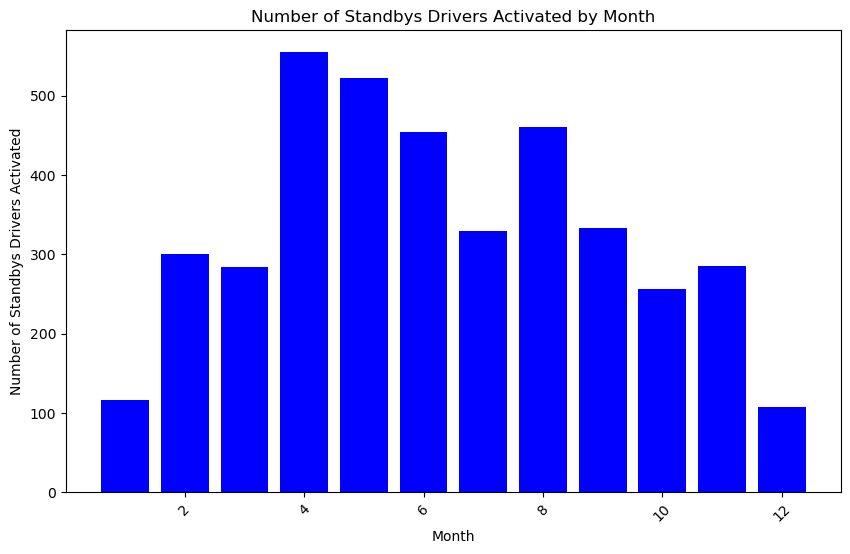

In [21]:
# Plotting number_of_standbys_activated against entry_date
plt.figure(figsize=(10, 6))
plt.bar(df['month'], df['number_of_standbys_activated'], color='blue')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of Standbys Drivers Activated')
plt.title('Number of Standbys Drivers Activated by Month')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Model Building

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')

In [67]:
# Extract features and target variable
X = df.drop(["entry_date", "number_of_standbys_activated", "number_of_standby_resources_available"], axis=1)
y = df['number_of_standbys_activated']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
# Baseline model: Use mean of training labels as prediction
baseline_prediction = np.mean(y_train)

# Evaluate baseline model
baseline_predictions = np.full_like(y_test, baseline_prediction)
baseline_mse = mean_squared_error(y_test, baseline_predictions)
baseline_r2 = r2_score(y_test, baseline_predictions)

print("Baseline Mean Squared Error:", baseline_mse)
print("Baseline R^2 Score:", baseline_r2)

Baseline Mean Squared Error: 7431.443379214836
Baseline R^2 Score: -0.0026858076987716917


In [70]:
# Train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Mean Squared Error:", mse_lr)
print("Linear Regression R^2 Score:", r2_lr)


Linear Regression Mean Squared Error: 461.50677622602274
Linear Regression R^2 Score: 0.9377313031849357


In [71]:
# Instantiate the decision tree regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the decision tree model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the decision tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Mean Squared Error:", mse_dt)
print("Decision Tree R^2 Score:", r2_dt)

Decision Tree Mean Squared Error: 22.87012987012987
Decision Tree R^2 Score: 0.9969142529289606


In [72]:
# Instantiate the Random Forest regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R^2 Score:", r2_rf)

Random Forest Mean Squared Error: 37.6838774891775
Random Forest R^2 Score: 0.9949155114007678


In [73]:
# Instantiate the SVR model
svr = SVR(kernel='rbf')  # You can specify different kernels like 'linear', 'poly', 'rbf', etc.

# Train the SVR model
svr.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr.predict(X_test)

# Evaluate the SVR model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR Mean Squared Error:", mse_svr)
print("SVR R^2 Score:", r2_svr)

SVR Mean Squared Error: 8036.520991491197
SVR R^2 Score: -0.08432576691351401


In [74]:
# Instantiate the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength by changing alpha

# Train the Ridge Regression model
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Mean Squared Error:", mse_ridge)
print("Ridge Regression R^2 Score:", r2_ridge)

Ridge Regression Mean Squared Error: 461.5062837932921
Ridge Regression R^2 Score: 0.9377313696263099


In [75]:
# Instantiate the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the regularization strength by changing alpha

# Train the Lasso Regression model
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso Regression model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Mean Squared Error:", mse_lasso)
print("Lasso Regression R^2 Score:", r2_lasso)

Lasso Regression Mean Squared Error: 460.0402220076037
Lasso Regression R^2 Score: 0.937929177679296


In [76]:
# Instantiate the MultiLayerPerceptronRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Train the MLPRegressor model
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the MLPRegressor model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("MLP Regression Mean Squared Error:", mse_mlp)
print("MLP Regression R^2 Score:", r2_mlp)

MLP Regression Mean Squared Error: 106.2244663212508
MLP Regression R^2 Score: 0.9856676880417883


In [77]:
model_evaluation = pd.DataFrame({"mse":[baseline_mse, mse_lr, mse_dt, mse_rf, mse_svr, mse_ridge, mse_lasso, mse_mlp],
                                 "r2":[baseline_r2, r2_lr, r2_dt, r2_rf, r2_svr, r2_ridge, r2_lasso, r2_mlp],
                                 "label":["Baseline", "Linear Regression", "Decision Tree", "Random Forest",
                                          "SVR", "Ridge Regression", "Lasso Regression", "MLP Regression"]})

In [78]:
model_evaluation.head(20)

,mse,r2,label
0,7431.443379,-0.002686,Baseline
1,461.506776,0.937731,Linear Regression
2,22.870130,0.996914,Decision Tree
3,37.683877,0.994916,Random Forest
4,8036.520991,-0.084326,SVR
5,461.506284,0.937731,Ridge Regression
6,460.040222,0.937929,Lasso Regression
7,106.224466,0.985668,MLP Regression


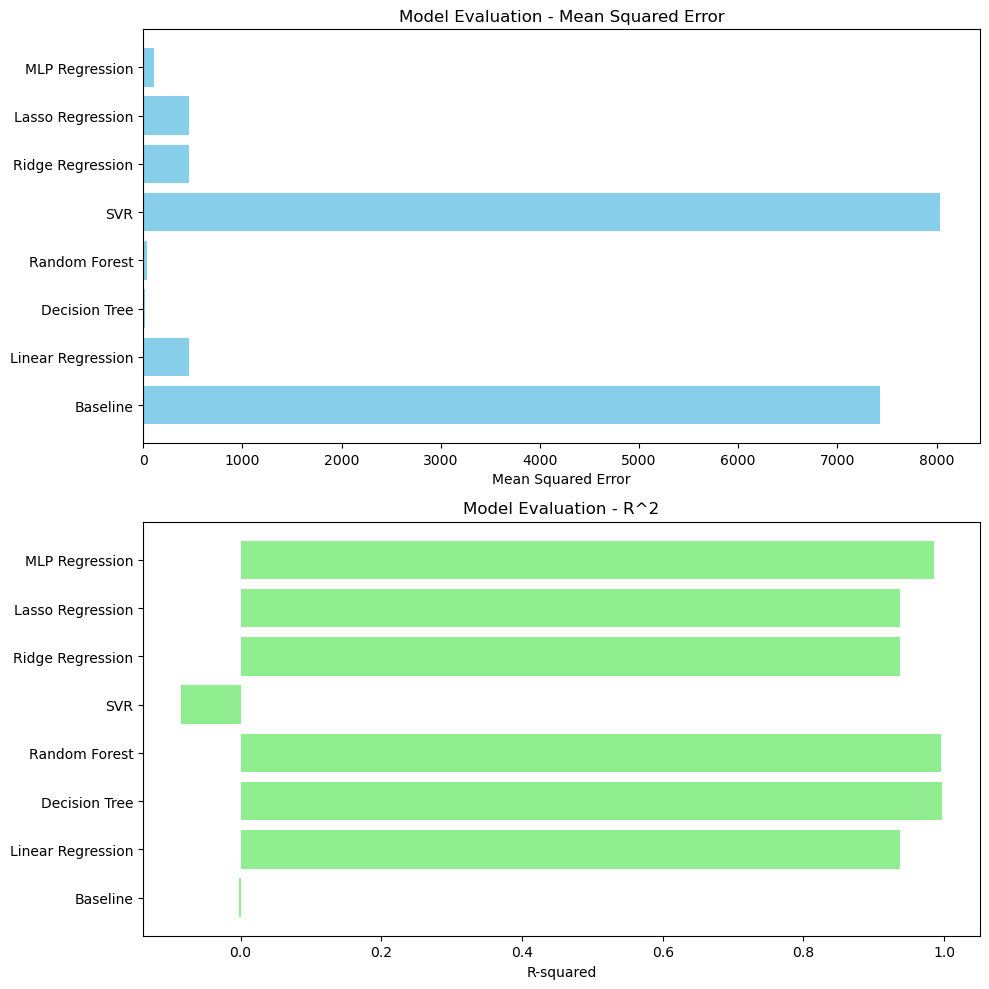

In [80]:
# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# MSE plot
ax1.barh(model_evaluation['label'], model_evaluation['mse'], color='skyblue')
ax1.set_xlabel('Mean Squared Error')
ax1.set_title('Model Evaluation - Mean Squared Error')

# R^2 plot
ax2.barh(model_evaluation['label'], model_evaluation['r2'], color='lightgreen')
ax2.set_xlabel('R-squared')
ax2.set_title('Model Evaluation - R^2')

plt.tight_layout()
plt.show()

Based on the results, Decision Tree is the best performing model. Therefore, we will use it.

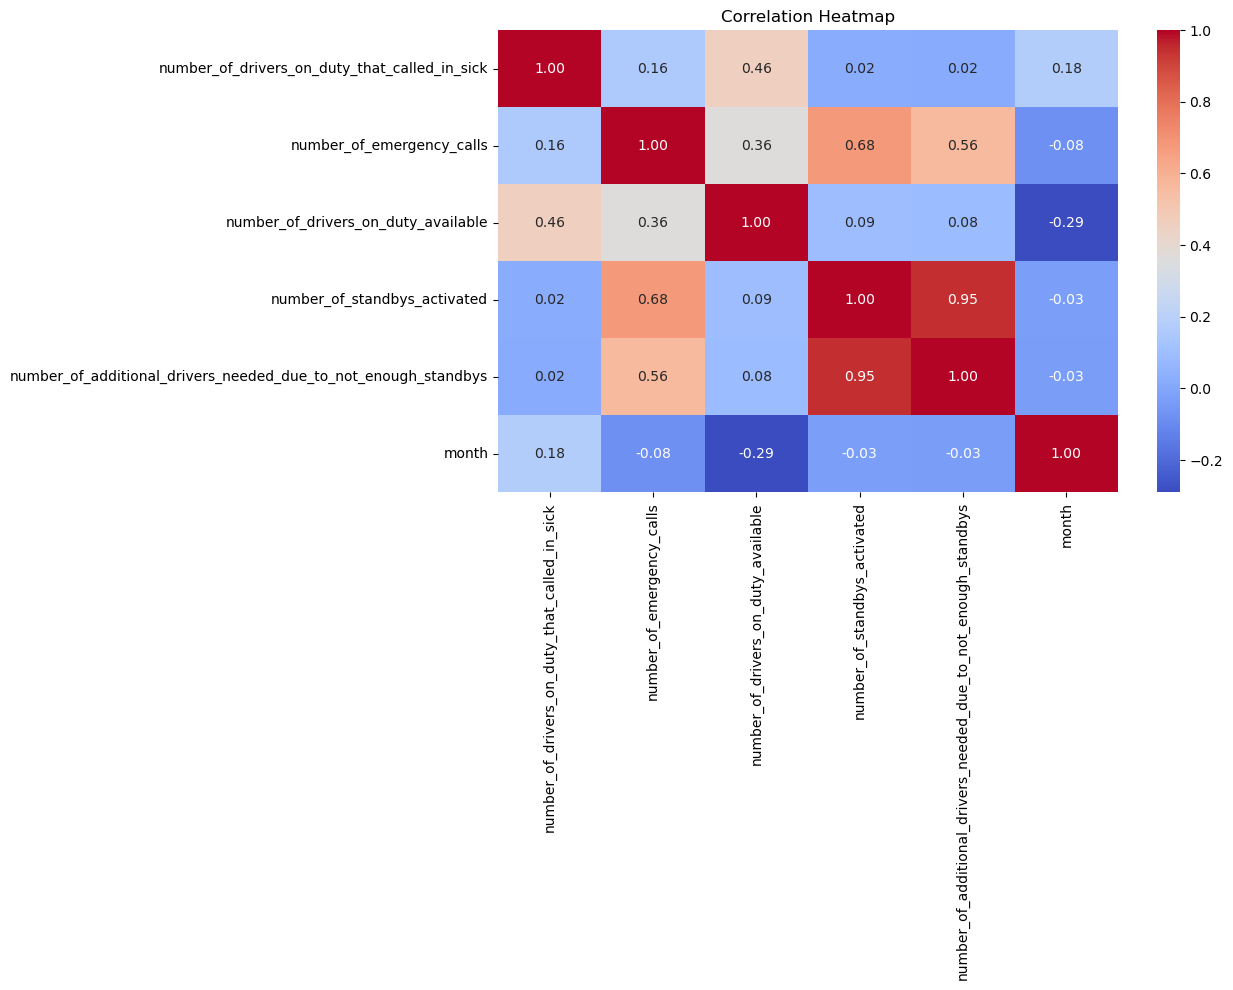

In [22]:
# Calculate correlation matrix
correlation_matrix = df.drop(columns=['entry_date',"number_of_standby_resources_available"]).corr()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

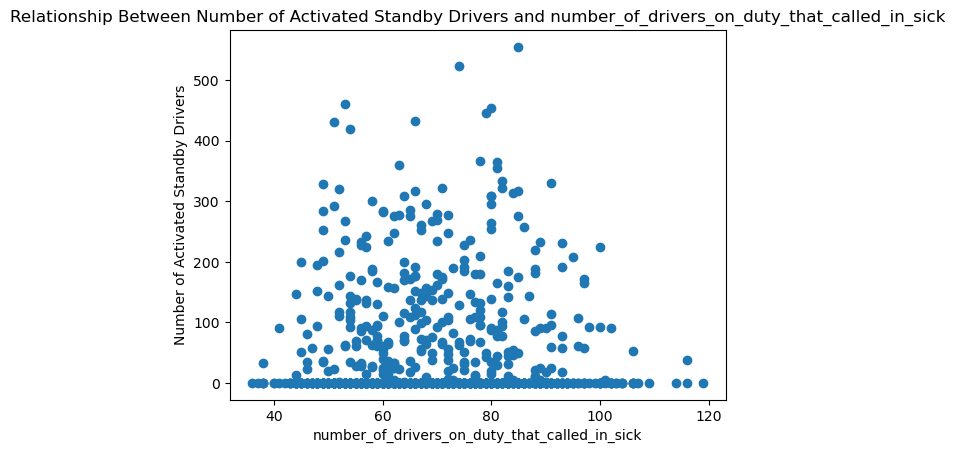

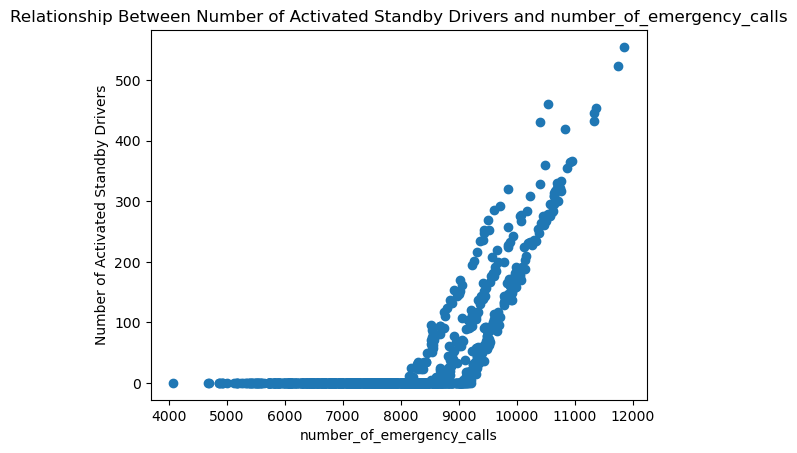

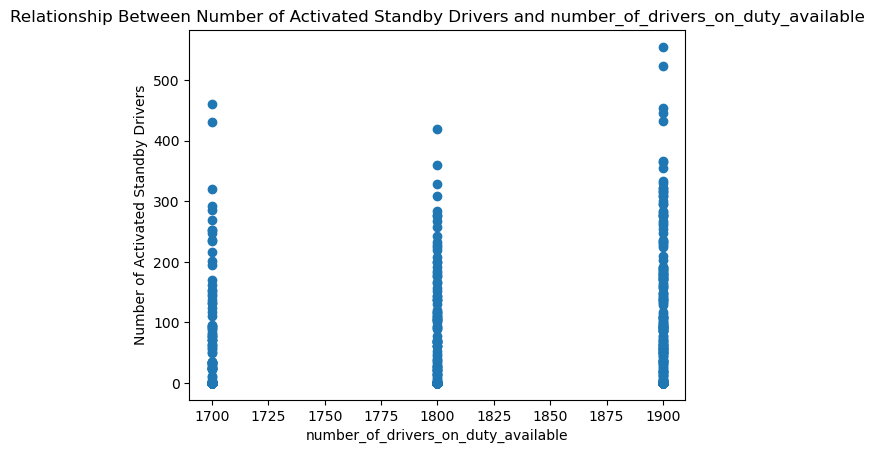

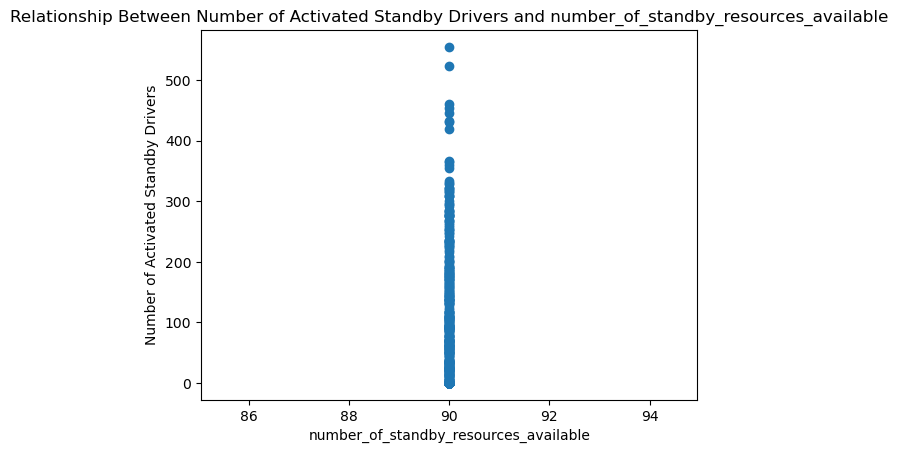

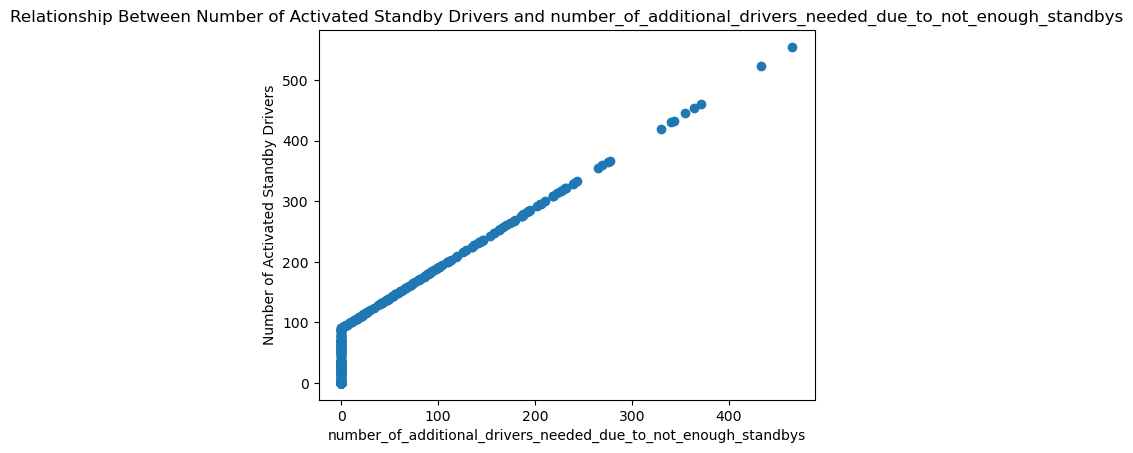

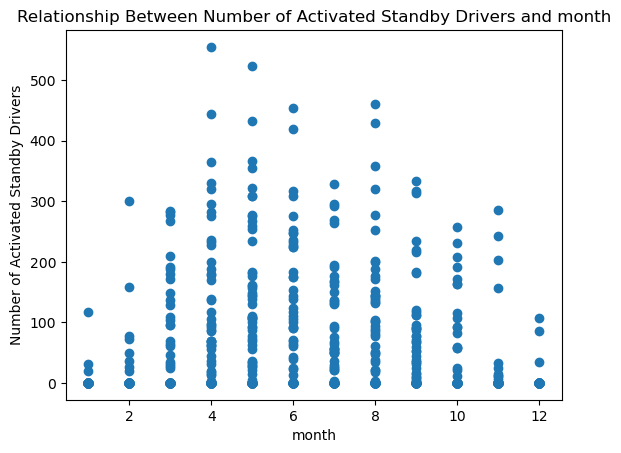

In [111]:
# Numerical columns
df_numerical_columns = df.drop(columns=['entry_date','number_of_standbys_activated'])

# Relationship between the target variables and the numerical variables

for label in df_numerical_columns.columns:
  plt.scatter(df_numerical_columns[label], df["number_of_standbys_activated"])
  plt.title(f'Relationship Between Number of Activated Standby Drivers and {label}')
  plt.xlabel(label)
  plt.ylabel("Number of Activated Standby Drivers")
  plt.show()